In [51]:
#importing libraries

import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
import time as time
from datetime import datetime


In [52]:
# Importing uber Data Set

df=pd.read_csv(r"C:\Users\HasvithaSai\Desktop\IIITB\UberSupplyDemandProblem\Uber Request Data.csv")

In [53]:
df1=pd.read_csv(r"C:\Users\HasvithaSai\Desktop\IIITB\UberSupplyDemandProblem\Uber Request Data.csv")

In [54]:
# knowing about data set like information, datatypes, null, counts, etc
df.shape

(6745, 6)

In [55]:
df.describe

<bound method NDFrame.describe of       Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
5           3879      Airport        1.0     Trip Completed   
6           4270      Airport        1.0     Trip Completed   
7           5510      Airport        1.0     Trip Completed   
8           6248         City        1.0     Trip Completed   
9            267         City        2.0     Trip Completed   
10          1467      Airport        2.0     Trip Completed   
11          1983         City        2.0     Trip Completed   
12          2784      Airport        2.0     Trip Completed   
13          3075         City        2.0     Trip Completed   
14          3379     

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [57]:
df.head(5)


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [58]:
# converting time object to datetime mode

df['requestDateTime'] = pd.to_datetime(df['Request timestamp'])

In [59]:
# splitting date and time as different columns from the request time column
df['request_date'] = [d.date() for d in df['requestDateTime']]
df['request_time'] = [d.time() for d in df['requestDateTime']]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
requestDateTime      6745 non-null datetime64[ns]
request_date         6745 non-null object
request_time         6745 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 474.3+ KB


In [61]:
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,requestDateTime,request_date,request_time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,2016-11-07,11:51:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,2016-11-07,17:57:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,2016-12-07,09:17:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,2016-12-07,21:08:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13,08:33:16


In [62]:
df1.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [63]:
# converting drop time object column to datetime mode



df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

# splitting drop time, drop date as two columns from drop date column

df['drop_date'] = df['Drop timestamp'].dt.strftime('%Y-%m-%d')
df['drop_time'] = df['Drop timestamp'].dt.strftime('%H:%M:%S')


"""
df['request_date'] = [d.date() for d in df['requestDateTime']]
df['request_time'] = [d.time() for d in df['requestDateTime'] """

"\ndf['request_date'] = [d.date() for d in df['requestDateTime']]\ndf['request_time'] = [d.time() for d in df['requestDateTime'] "

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null datetime64[ns]
requestDateTime      6745 non-null datetime64[ns]
request_date         6745 non-null object
request_time         6745 non-null object
drop_date            6745 non-null object
drop_time            6745 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 579.7+ KB


In [65]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,requestDateTime,request_date,request_time,drop_date,drop_time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,2016-11-07 13:00:00,2016-11-07 11:51:00,2016-11-07,11:51:00,2016-11-07,13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,2016-11-07 18:47:00,2016-11-07 17:57:00,2016-11-07,17:57:00,2016-11-07,18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,2016-12-07 09:58:00,2016-12-07 09:17:00,2016-12-07,09:17:00,2016-12-07,09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,2016-12-07 22:03:00,2016-12-07 21:08:00,2016-12-07,21:08:00,2016-12-07,22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,2016-07-13 09:25:47,2016-07-13 08:33:16,2016-07-13,08:33:16,2016-07-13,09:25:47


In [66]:
# splitting hour from drop time
import datetime
df['Dhour']=df['Drop timestamp'].dt.hour

In [67]:
# splitting about request
df['Reqhour']=(df['Request timestamp'].str.split(':')).apply(lambda n:n[0],[df['Request timestamp'].tolist()])
df['Reqhour']=(df['Reqhour'].str.split(' ')).apply(lambda n:n[1],[df['Reqhour'].tolist()])

In [68]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,requestDateTime,request_date,request_time,drop_date,drop_time,Dhour,Reqhour
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,2016-11-07 13:00:00,2016-11-07 11:51:00,2016-11-07,11:51:00,2016-11-07,13:00:00,13.0,11
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,2016-11-07 18:47:00,2016-11-07 17:57:00,2016-11-07,17:57:00,2016-11-07,18:47:00,18.0,17
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,2016-12-07 09:58:00,2016-12-07 09:17:00,2016-12-07,09:17:00,2016-12-07,09:58:00,9.0,9
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,2016-12-07 22:03:00,2016-12-07 21:08:00,2016-12-07,21:08:00,2016-12-07,22:03:00,22.0,21
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,2016-07-13 09:25:47,2016-07-13 08:33:16,2016-07-13,08:33:16,2016-07-13,09:25:47,9.0,08


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null datetime64[ns]
requestDateTime      6745 non-null datetime64[ns]
request_date         6745 non-null object
request_time         6745 non-null object
drop_date            6745 non-null object
drop_time            6745 non-null object
Dhour                2831 non-null float64
Reqhour              6745 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory usage: 685.1+ KB


In [70]:
Req_daymode=[]
drp_daymode=[]

In [71]:
#function for day solt finding
def daymode(a):
    for i in a:
        if i >= 0 and i < 6:
            drp_daymode.append('early_morning')
        elif i >= 6 and i < 12:
            drp_daymode.append('morning')
        elif i >= 12 and i < 16:
            drp_daymode.append('afternoon')
        elif i >=16  and i < 19:
            drp_daymode.append('evening')
        else:
            drp_daymode.append('night')
            

In [72]:
daymode(df['Dhour'])

In [73]:
df['DRP_Daymode']=pd.DataFrame(drp_daymode,columns=['col1'])

In [74]:
df['sequence']=1

In [75]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,requestDateTime,request_date,request_time,drop_date,drop_time,Dhour,Reqhour,DRP_Daymode,sequence
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,2016-11-07 13:00:00,2016-11-07 11:51:00,2016-11-07,11:51:00,2016-11-07,13:00:00,13.0,11,afternoon,1
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,2016-11-07 18:47:00,2016-11-07 17:57:00,2016-11-07,17:57:00,2016-11-07,18:47:00,18.0,17,evening,1
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,2016-12-07 09:58:00,2016-12-07 09:17:00,2016-12-07,09:17:00,2016-12-07,09:58:00,9.0,9,morning,1
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,2016-12-07 22:03:00,2016-12-07 21:08:00,2016-12-07,21:08:00,2016-12-07,22:03:00,22.0,21,night,1
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,2016-07-13 09:25:47,2016-07-13 08:33:16,2016-07-13,08:33:16,2016-07-13,09:25:47,9.0,08,morning,1


In [76]:
# creating column for request day mode slot
def rdaymode(a):
    for j in a:
        if j >= 0 and j < 6:
            Req_daymode.append('early_morning')
        elif j >= 6 and j < 12:
            Req_daymode.append('morning')
        elif j >= 12 and j < 16:
            Req_daymode.append('afternoon')
        elif j >=16  and j < 19:
            Req_daymode.append('evening')
        else:
            Req_daymode.append('night')

In [77]:
df['Reqhour']=pd.to_numeric(df['Reqhour'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 15 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null datetime64[ns]
requestDateTime      6745 non-null datetime64[ns]
request_date         6745 non-null object
request_time         6745 non-null object
drop_date            6745 non-null object
drop_time            6745 non-null object
Dhour                2831 non-null float64
Reqhour              6745 non-null int64
DRP_Daymode          6745 non-null object
sequence             6745 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(8)
memory usage: 790.5+ KB


In [79]:
rdaymode(df['Reqhour'])

In [80]:
df['REQ_Daymode']=pd.DataFrame(Req_daymode,columns=['col1'])

In [81]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,requestDateTime,request_date,request_time,drop_date,drop_time,Dhour,Reqhour,DRP_Daymode,sequence,REQ_Daymode
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,2016-11-07 13:00:00,2016-11-07 11:51:00,2016-11-07,11:51:00,2016-11-07,13:00:00,13.0,11,afternoon,1,morning
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,2016-11-07 18:47:00,2016-11-07 17:57:00,2016-11-07,17:57:00,2016-11-07,18:47:00,18.0,17,evening,1,evening
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,2016-12-07 09:58:00,2016-12-07 09:17:00,2016-12-07,09:17:00,2016-12-07,09:58:00,9.0,9,morning,1,morning
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,2016-12-07 22:03:00,2016-12-07 21:08:00,2016-12-07,21:08:00,2016-12-07,22:03:00,22.0,21,night,1,night
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,2016-07-13 09:25:47,2016-07-13 08:33:16,2016-07-13,08:33:16,2016-07-13,09:25:47,9.0,8,morning,1,morning
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,2016-07-13 22:28:59,2016-07-13 21:57:28,2016-07-13,21:57:28,2016-07-13,22:28:59,22.0,21,night,1,night
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,2016-07-14 07:13:15,2016-07-14 06:15:32,2016-07-14,06:15:32,2016-07-14,07:13:15,7.0,6,morning,1,morning
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,2016-07-15 06:07:52,2016-07-15 05:11:52,2016-07-15,05:11:52,2016-07-15,06:07:52,6.0,5,morning,1,early_morning
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,2016-07-15 18:50:51,2016-07-15 17:57:27,2016-07-15,17:57:27,2016-07-15,18:50:51,18.0,17,evening,1,evening
9,267,City,2.0,Trip Completed,11/7/2016 6:46,2016-11-07 07:25:00,2016-11-07 06:46:00,2016-11-07,06:46:00,2016-11-07,07:25:00,7.0,6,morning,1,morning


In [82]:
df.groupby(['Status']).size()

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
dtype: int64

In [83]:
df1['Request timestamp'] = df1['Request timestamp'].str.replace('/','-')
df1['Drop timestamp'] = df1['Drop timestamp'].str.replace('/','-')
df1['Drop timestamp'].fillna('1988-12-31 00:00:00', inplace=True)
df1['Request timestamp'] =  pd.to_datetime(df1['Request timestamp'], dayfirst=True)
df1['Drop timestamp'] =  pd.to_datetime(df1['Drop timestamp'], dayfirst=True)
df1['Drop timestamp'] =  pd.to_datetime(df1['Drop timestamp'], dayfirst=True)
df['durationss']=(df1['Drop timestamp'] - df1['Request timestamp'])
x=df['durationss'].dt.components
df['time_hours']=round((x['hours']*60+x['minutes'])/60,2)

In [84]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,requestDateTime,request_date,request_time,drop_date,drop_time,Dhour,Reqhour,DRP_Daymode,sequence,REQ_Daymode,durationss,time_hours
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,2016-11-07 13:00:00,2016-11-07 11:51:00,2016-11-07,11:51:00,2016-11-07,13:00:00,13.0,11,afternoon,1,morning,01:09:00,1.15
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,2016-11-07 18:47:00,2016-11-07 17:57:00,2016-11-07,17:57:00,2016-11-07,18:47:00,18.0,17,evening,1,evening,00:50:00,0.83
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,2016-12-07 09:58:00,2016-12-07 09:17:00,2016-12-07,09:17:00,2016-12-07,09:58:00,9.0,9,morning,1,morning,00:41:00,0.68
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,2016-12-07 22:03:00,2016-12-07 21:08:00,2016-12-07,21:08:00,2016-12-07,22:03:00,22.0,21,night,1,night,00:55:00,0.92
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,2016-07-13 09:25:47,2016-07-13 08:33:16,2016-07-13,08:33:16,2016-07-13,09:25:47,9.0,8,morning,1,morning,00:52:31,0.87


In [85]:
time_hours=[]

In [86]:
# creating time bins
def timehours(a):
    for i in df['time_hours']:
        if i >= 0 and i < 3:
            time_hours.append('0-3hrs')
        elif i >= 3 and i < 6:
            time_hours.append('3-6hrs')
        elif i >= 6 and i < 9:
            time_hours.append('6-9hrs')
        elif i >= 9 and i < 12:
            time_hours.append('9-12hrs')
        elif i >= 12 and i < 15:
            time_hours.append('12-15hrs')
        elif i >= 15 and i < 18:
            time_hours.append('15-18hrs')
        elif i >= 18 and i < 21:
            time_hours.append('18-21hrs')
        elif i >= 21 and i < 24:
            time_hours.append('21-24hrs')
        else:
            time_hours.append('None')

In [87]:
timehours(df['time_hours'])

In [88]:
df['wait_period']=pd.DataFrame(time_hours,columns=['col1'])

In [89]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,requestDateTime,request_date,request_time,drop_date,drop_time,Dhour,Reqhour,DRP_Daymode,sequence,REQ_Daymode,durationss,time_hours,wait_period
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaT,2016-07-15 23:49:03,2016-07-15,23:49:03,NaT,NaT,NaN,23,night,1,night,-10059 days +00:10:57,0.17,0-3hrs
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaT,2016-07-15 23:50:05,2016-07-15,23:50:05,NaT,NaT,NaN,23,night,1,night,-10059 days +00:09:55,0.15,0-3hrs
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaT,2016-07-15 23:52:06,2016-07-15,23:52:06,NaT,NaT,NaN,23,night,1,night,-10059 days +00:07:54,0.12,0-3hrs
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaT,2016-07-15 23:54:39,2016-07-15,23:54:39,NaT,NaT,NaN,23,night,1,night,-10059 days +00:05:21,0.08,0-3hrs
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaT,2016-07-15 23:55:03,2016-07-15,23:55:03,NaT,NaT,NaN,23,night,1,night,-10059 days +00:04:57,0.07,0-3hrs


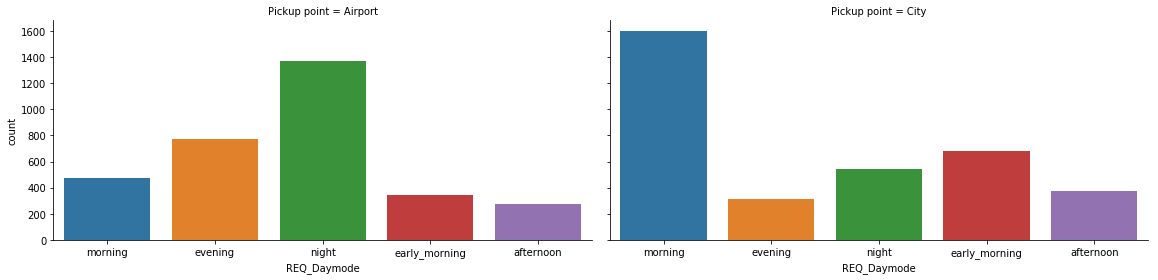

In [90]:
# plotting traffic from airport to city and city to airport

sns.factorplot(x='REQ_Daymode',col='Pickup point',data=df,kind='count', aspect=2)

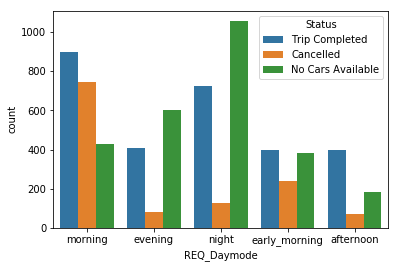

In [91]:
# plotting request day slot and resepctive status like complete,cancel,no cars
sns.countplot(x='REQ_Daymode',hue='Status',data=df)

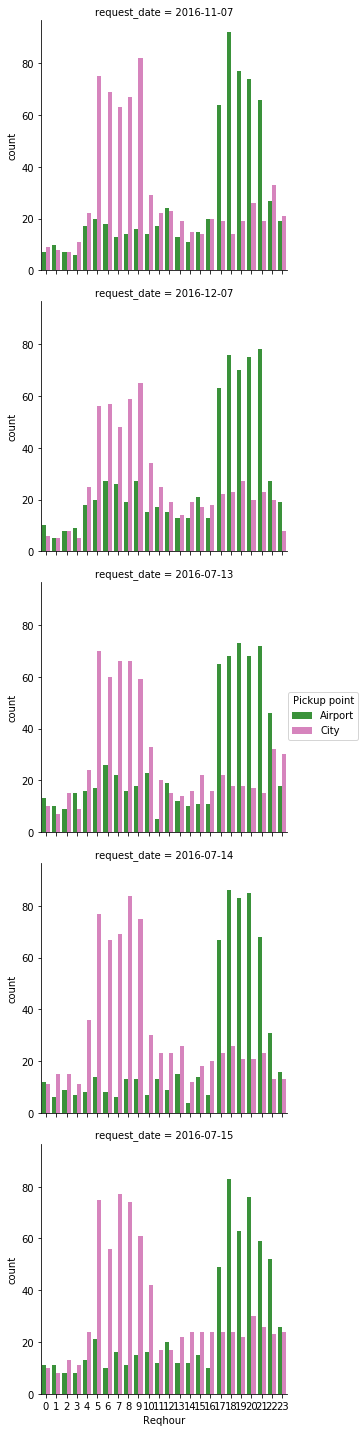

In [92]:
sns.factorplot(x='Reqhour',row='request_date',hue='Pickup point',ci=None,palette=['C2','C6'],data=df,kind='count',estimator=np.sum)
plt.show()

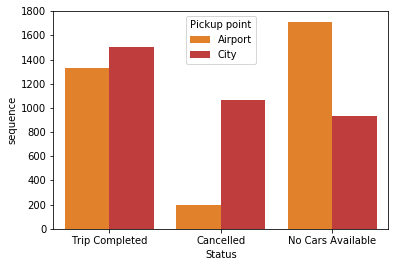

In [93]:
#plotting checkpoint and status, count of cars
sns.barplot(x='Status',y='sequence',hue=df['Pickup point'],ci=None,palette=['C1','C3'],data=df,estimator=np.sum)

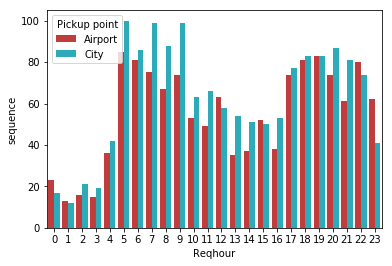

In [94]:
#hour wise airport and city traffic
sns.barplot(x='Reqhour',y='sequence',hue=df['Pickup point'],ci=None,palette=['C3','C9'],data=df[df['Status']=='Trip Completed'],estimator=np.sum)

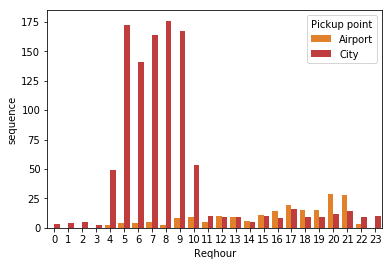

In [95]:
# hourwise airport to city plotting
sns.barplot(x='Reqhour',y='sequence',hue=df['Pickup point'],ci=None,palette=['C1','C3'],data=df[df['Status']=='Cancelled'],estimator=np.sum)

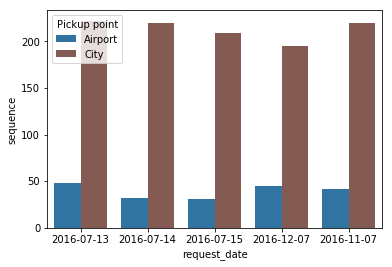

In [96]:
#date wise traffic intensity
sns.barplot(x='request_date',y='sequence',hue=df['Pickup point'],ci=None,palette=['C0','C5'],data=df[df['Status']=='Cancelled'],estimator=np.sum)

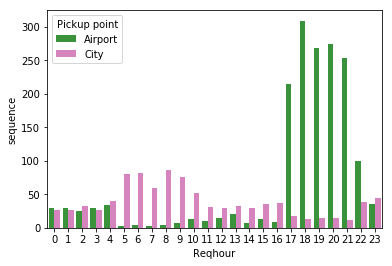

In [97]:
sns.barplot(x='Reqhour',y='sequence',hue=df['Pickup point'],ci=None,palette=['C2','C6'],data=df[df['Status']=='No Cars Available'],estimator=np.sum)

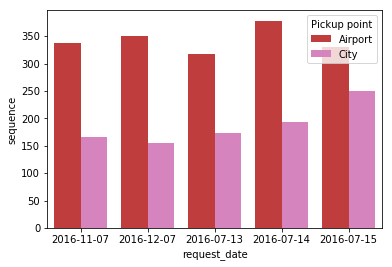

In [98]:
sns.barplot(x='request_date',y='sequence',hue=df['Pickup point'],ci=None,palette=['C3','C6'],data=df[df['Status']=='No Cars Available'],estimator=np.sum)

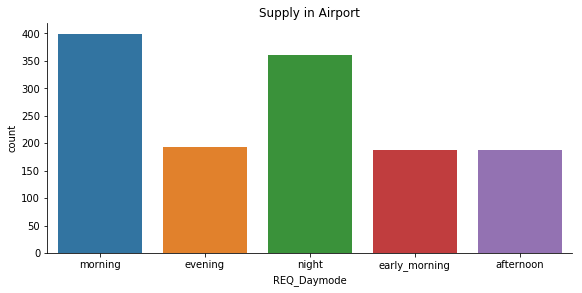

In [99]:
# Supply day mode wise to airport
sns.factorplot(x='REQ_Daymode',data=df[(df['Pickup point']=='Airport')& (df['Status']=='Trip Completed')],kind='count',aspect=2)
plt.title("Supply in Airport")
plt.show()

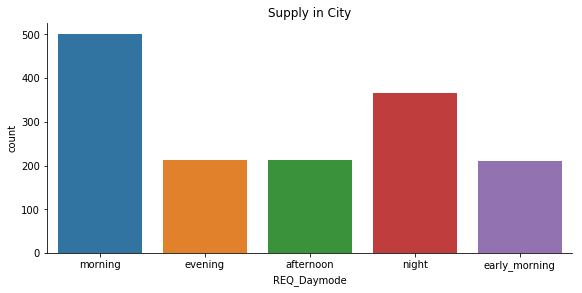

In [100]:
# Supply day mode wise at City
sns.factorplot(x='REQ_Daymode',data=df[(df['Pickup point']=='City')& (df['Status']=='Trip Completed')],kind='count', aspect=2)
plt.title("Supply in City")
plt.show()